In [1]:
import numpy as np

T1 = np.double(.01)
T2 = np.arange(T1/10, 2*T1, T1/50)
taus = np.arange(T1/10, 10*T1, T1/100)
T1 = np.full(len(T2),T1)
n = 3

p_amp =[]
p_phase =[]
for tau in taus:
    p_amp.append(1-np.exp(-tau/T1))
    p_phase.append(1-np.exp(-(1/T2 - 1/(2*T1))*tau))

# print(p_phase)


Matplotlib is building the font cache; this may take a moment.


found i 


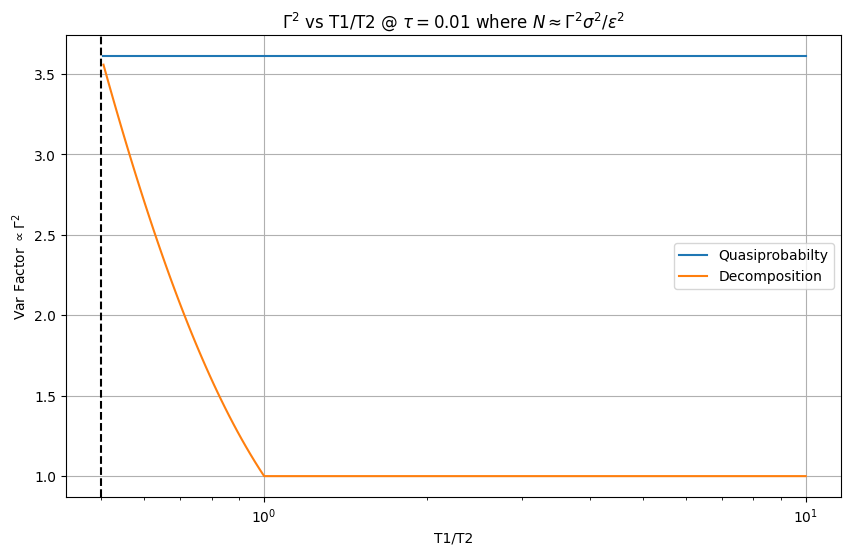

In [2]:
import matplotlib.pyplot as plt

def overhead(q):
    """Calculate overhead Gamma = sum of absolute values."""
    overhead = np.sum(np.abs(q))**n
    return overhead

def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma

    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2

    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])

var_curve1 = []
var_curve2 = []

tau_T1_index = 0

for i, tau in enumerate(taus):
    curve1 = []
    curve2 = []
    if(round(tau, 8) == round(T1[0], 8)):
        print("found i ")
        tau_T1_index = i
    for gamma, lam in zip(p_amp[i], p_phase[i]):
        q1, q2 = generate_pdf(gamma, lam/2)
        
        # Normalize to sum 1 (or ensure sum=1)
        # q1 /= np.sum(q1)
        # q2 /= np.sum(q2)
        
        """Find Gamma^2"""
        curve1.append(overhead(q1)**2)
        curve2.append(overhead(q2)**2)
    var_curve1.append(curve1)
    var_curve2.append(curve2)

# Plotting
plt.figure(figsize=(10,6))
plt.axvline(x=.5, color='black', linestyle='--')
plt.plot(np.array(T1)/T2, var_curve1[tau_T1_index], label='Quasiprobabilty')
plt.plot(np.array(T1)/T2, var_curve2[tau_T1_index], label='Decomposition')
plt.xlabel('T1/T2')
plt.xscale('log')
plt.ylabel(rf'Var Factor $\propto \Gamma^2$')
plt.title(rf'$\Gamma^2$ vs T1/T2 @ $\tau={round(taus[tau_T1_index],8)}$ where $N \approx \Gamma^2 \sigma^2 / \epsilon^2$')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/ch/b9nk2s4s0wd77l2b780z9wdh0000gn/T/ipykernel_39347/370245883.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


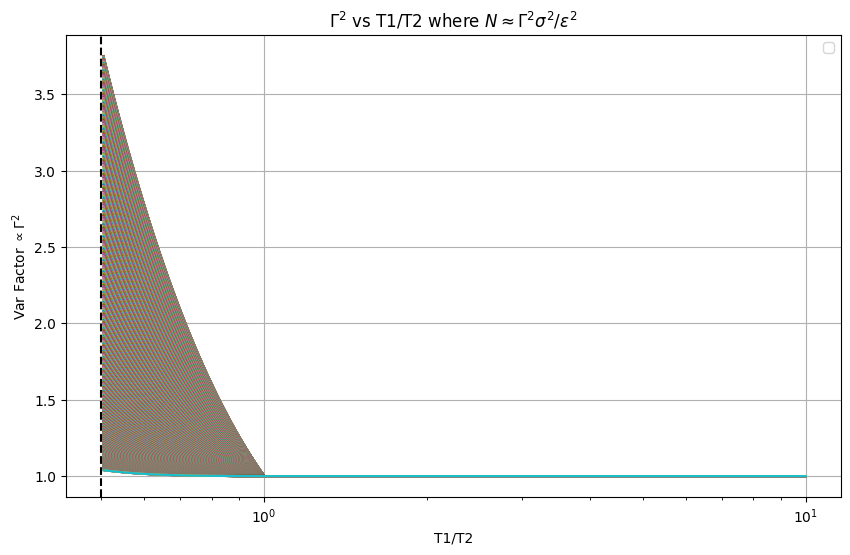

In [3]:
plt.figure(figsize=(10,6))
plt.axvline(x=.5, color='black', linestyle='--')
for curve1, curve2 in zip(var_curve1, var_curve2):
    # plt.plot(np.array(T1)/T2, curve1)#, label='Quasiprobabilty')
    plt.plot(np.array(T1)/T2, curve2)#, label='Decomposition')
plt.xlabel('T1/T2')
plt.xscale('log')
plt.ylabel(rf'Var Factor $\propto \Gamma^2$')
plt.title(rf'$\Gamma^2$ vs T1/T2 where $N \approx \Gamma^2 \sigma^2 / \epsilon^2$')
plt.legend()
plt.grid(True)
plt.show()


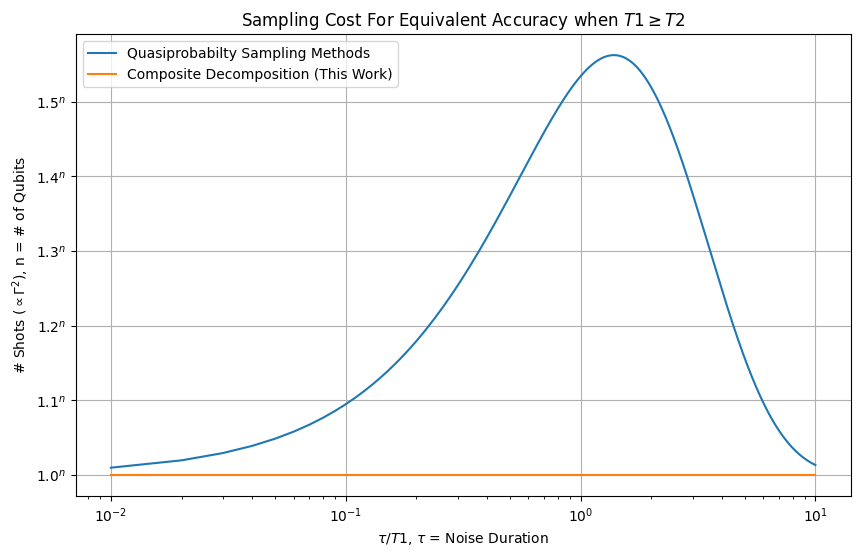

In [4]:
import numpy as np
import matplotlib.pyplot as plt

T1 = .01
T2 = T1
taus = np.arange(T1/100, 10*T1, T1/100)
n = 1

p_amp =[]
p_phase =[]
for tau in taus:
    p_amp.append(1-np.exp(-tau/T1))
    p_phase.append(1-np.exp(-(1/T2 - 1/(2*T1))*tau))


def overhead(q):
    """Calculate overhead Gamma = sum of absolute values."""
    overhead = np.sum(np.abs(q))**n
    return overhead

def generate_pdf(gamma, p):
    c0 = 0.5 * (1.0-gamma+np.sqrt(1.0-gamma))
    c1 = 0.5 * (1.0-gamma-np.sqrt(1.0-gamma))
    c2 = gamma

    c0_tot = (1 - p) * c0 + p * c1
    c1_tot = p * c0 + (1 - p) * c1
    c2_tot = c2

    return np.array([c0, c1, c2]), np.array([c0_tot, c1_tot, c2_tot])



tau_T1_index = 0

curve1 = []
curve2 = []

for gamma, lam in zip(p_amp, p_phase):
    q1, q2 = generate_pdf(gamma, lam/2)
    
    # Normalize to sum 1 (or ensure sum=1)
    # q1 /= np.sum(q1)
    # q2 /= np.sum(q2)
    
    """Find Gamma^2"""
    curve1.append(overhead(q1)**2)
    curve2.append(overhead(q2)**2)

# Plotting
# Plotting
plt.figure(figsize=(10,6))
plt.plot(taus/T1, curve1, label='Quasiprobabilty Sampling Methods')
plt.plot(taus/T1, curve2, label='Composite Decomposition (This Work)')
plt.xlabel(rf'$\tau /T1$, $\tau$ = Noise Duration')
plt.xscale('log')
plt.ylabel(rf'# Shots ($\propto \Gamma^2$), n = # of Qubits')
plt.title(rf'Sampling Cost For Equivalent Accuracy when $T1 \geq T2$')
plt.legend()
plt.grid(True)

# Format y-axis tick labels as value^n
import matplotlib.ticker as ticker
def format_func(value, tick_number):
    return rf'{round(value,8)}$^n$'

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_func))

plt.show()
